<a href="https://colab.research.google.com/github/ravikeerthi7606/faceDetection_YOLO/blob/main/faceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.1 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving My First Project.v3i.yolov11.zip to My First Project.v3i.yolov11.zip


In [4]:
import zipfile
import os

zip_path = "My First Project.v3i.yolov11.zip"   # change if name is different
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")

Unzipped successfully!


In [5]:
pip install split-folders

In [6]:
import splitfolders

input_folder = "dataset/train"   # your current folder
output_folder = "dataset_split"

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(0.8, 0.1, 0.1)   # train, val, test
)

Copying files: 560 files [00:00, 7565.39 files/s]


In [7]:
import os

for root, dirs, files in os.walk("/content/dataset"):
    print(root)

/content/dataset
/content/dataset/train
/content/dataset/train/images
/content/dataset/train/labels


In [9]:
import yaml

yaml_path = "/content/dataset/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

data['train'] = "/content/dataset_split/train/images"
data['val']   = "/content/dataset_split/val/images"
data['test']  = "/content/dataset_split/test/images"

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print(data)

{'train': '/content/dataset_split/train/images', 'val': '/content/dataset_split/val/images', 'test': '/content/dataset_split/test/images', 'nc': 2, 'names': ['hari', 'ravi'], 'roboflow': {'workspace': 'ravis-workspace-pn5e3', 'project': 'my-first-project-q2f4t', 'version': 3, 'license': 'MIT', 'url': 'https://universe.roboflow.com/ravis-workspace-pn5e3/my-first-project-q2f4t/dataset/3'}}


In [10]:
!pip install ultralytics

In [11]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

model.train(
    data="/content/dataset/data.yaml",
    epochs=60,
    imgsz=640,
    batch=8
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fb85c7fe30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [12]:
!ls runs/detect/train/weights

best.pt  last.pt


In [13]:
from google.colab import files
files.download("runs/detect/train/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

In [16]:
results = model("/content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM-1-_jpeg.rf.afb1f98a3dec0f7d22a10aa3e6a5f068.jpg", save=True)


image 1/1 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM-1-_jpeg.rf.afb1f98a3dec0f7d22a10aa3e6a5f068.jpg: 640x640 1 hari, 10.2ms
Speed: 4.2ms preprocess, 10.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict


In [18]:
import os

test_path = "/content/dataset_split/test"

img_name = os.listdir(test_path)[0]
img_path = os.path.join(test_path, img_name)

print("Testing on:", img_path)

results = model(img_path, save=True)

Testing on: /content/dataset_split/test/images

image 1/28 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-25-PM_jpeg.rf.7528cd13ea06ef7f8dffd9caeb4ed66c.jpg: 640x640 1 hari, 17.1ms
image 2/28 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM-1-_jpeg.rf.677dd15cc5ffe0db79c036831a85ad44.jpg: 640x640 1 hari, 27.5ms
image 3/28 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM-1-_jpeg.rf.809adaad92b60ddcf996d68b923b3dbd.jpg: 640x640 1 hari, 17.1ms
image 4/28 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM-1-_jpeg.rf.abf8f1531a27cdc81ebc39d0c61c5120.jpg: 640x640 1 hari, 41.5ms
image 5/28 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM-1-_jpeg.rf.afb1f98a3dec0f7d22a10aa3e6a5f068.jpg: 640x640 1 hari, 21.8ms
image 6/28 /content/dataset_split/test/images/WhatsApp-Image-2026-02-22-at-12-26-26-PM_jpeg.rf.f2cede7b7a69608525424c2861d74d27.jpg: 640x640 1 hari, 8.2ms
image

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

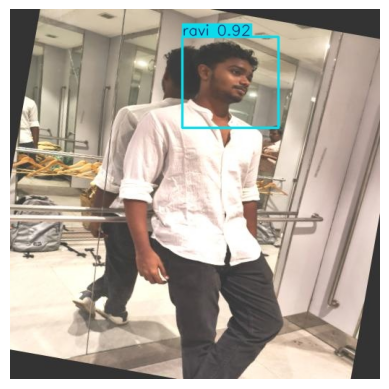

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
import os

pred_path = "/content/runs/detect/predict"

files = os.listdir(pred_path)

# show first image
img = Image.open(os.path.join(pred_path, files[1]))

plt.imshow(img)
plt.axis("off")